# English Gigaword Corpus - EDA

In [9]:
from IPython.core.display import Markdown, display
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import FreqDist
from nltk.util import ngrams  
from collections import Counter
from wordcloud import WordCloud
import itertools
import matplotlib.pyplot as plt
import string
import re

tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
translator = str.maketrans('', '', string.punctuation)
stop_words = set(stopwords.words('english'))

def printmd(string):
    display(Markdown(string))

%matplotlib inline

### Data load, Preprocessing, Basic details

In [27]:
def clean_doc(doc):
    words_only = tokenizer.tokenize(doc.strip())
    no_punctuation = [word.translate(translator) for word in words_only]
    lower_cased = [word.lower() for word in no_punctuation]
#     final_set = [word for word in lower_cased if wordnet.synsets(word, lang='eng')]
    
    return ' '.join(lower_cased)

In [28]:
def read_corpus(filename):
    with open(filename) as fp:
        docs = fp.readlines()

    tokens = []
    for idx in range(len(docs)):
        docs[idx] = clean_doc(docs[idx])
        if idx < 5:
            print(docs[idx] + '\n')
        tokens.extend(docs[idx].split())

    dictionary = set(tokens)

    print(f'number of documents: {len(docs)}')
    print(f'number of tokens: {len(tokens)}')
    print(f'dictionary size: {len(dictionary)}')
    print(f'lexical diversity of the corpus: {round(len(dictionary)/len(tokens), 3)}')
    
    return docs, tokens, dictionary


def merge_and_report_dictionaries(*dictionaries):
    merged = set(list(itertools.chain.from_iterable([[
        k for k in d
    ] for d in dictionaries])))
    print(f'merged dictionary size: {len(merged)}')
    return merged

In [29]:
train_docs, train_tokens, train_dictionary = read_corpus('./data/gigaword_corpus/train.txt')

australia s current account deficit shrunk by a record  billion dollars lrb  billion us rrb in the june quarter due to soaring commodity prices  figures released monday showed 

at least two people were killed in a suspected bomb attack on a passenger bus in the strife torn southern philippines on monday  the military said 

australian shares closed down  percent monday following a weak lead from the united states and lower commodity prices  dealers said 

south korea s nuclear envoy kim sook urged north korea monday to restart work to disable its nuclear plants and stop its  typical  brinkmanship in negotiations 

south korea on monday announced sweeping tax reforms  including income and corporate tax cuts to boost growth by stimulating sluggish private consumption and business investment 

number of documents: 300000
number of tokens: 8658023
dictionary size: 59035
lexical diversity of the corpus: 0.007


In [30]:
val_docs, val_tokens, val_dictionary = read_corpus('./data/gigaword_corpus/valid.txt')

five time world champion michelle kwan withdrew from the  us figure skating championships on wednesday  but will petition us skating officials for the chance to compete at the  turin olympics 

us business leaders lashed out wednesday at legislation that would penalize companies for employing illegal immigrants 

general motors corp  said wednesday its us sales fell  percent in december and four percent in  with the biggest losses coming from passenger car sales 

several thousand people gathered on wednesday evening on the main square in zagreb for a public draw and an open air party to celebrate the croatian capital s second chance to host the women s slalom world cup 

us first lady laura bush and us secretary of state condoleezza rice will represent the united states later this month at the inauguration of liberia s president elect ellen johnson sirleaf  the white house said wednesday 

number of documents: 12000
number of tokens: 341317
dictionary size: 17727
lexical diversity of 

### Word cloud, Common words

In [31]:
def word_analysis(tokens):
    frequency_dict = Counter(tokens)
    most_common = frequency_dict.most_common(200)
    most_common = [entry for entry in most_common if (entry[0] not in stop_words)]
    wc = WordCloud(background_color='white', width=600, height=400)
    wc.generate_from_frequencies(dict(most_common))
    
    most_common = dict(list(most_common[:20]))
    
    fig, axes = plt.subplots(1, 2, figsize=(26, 12))
    axes[0].imshow(wc)
    axes[0].axis('off')
    axes[1].bar(most_common.keys(), most_common.values())
    plt.xticks(rotation=90)

training data words analysis


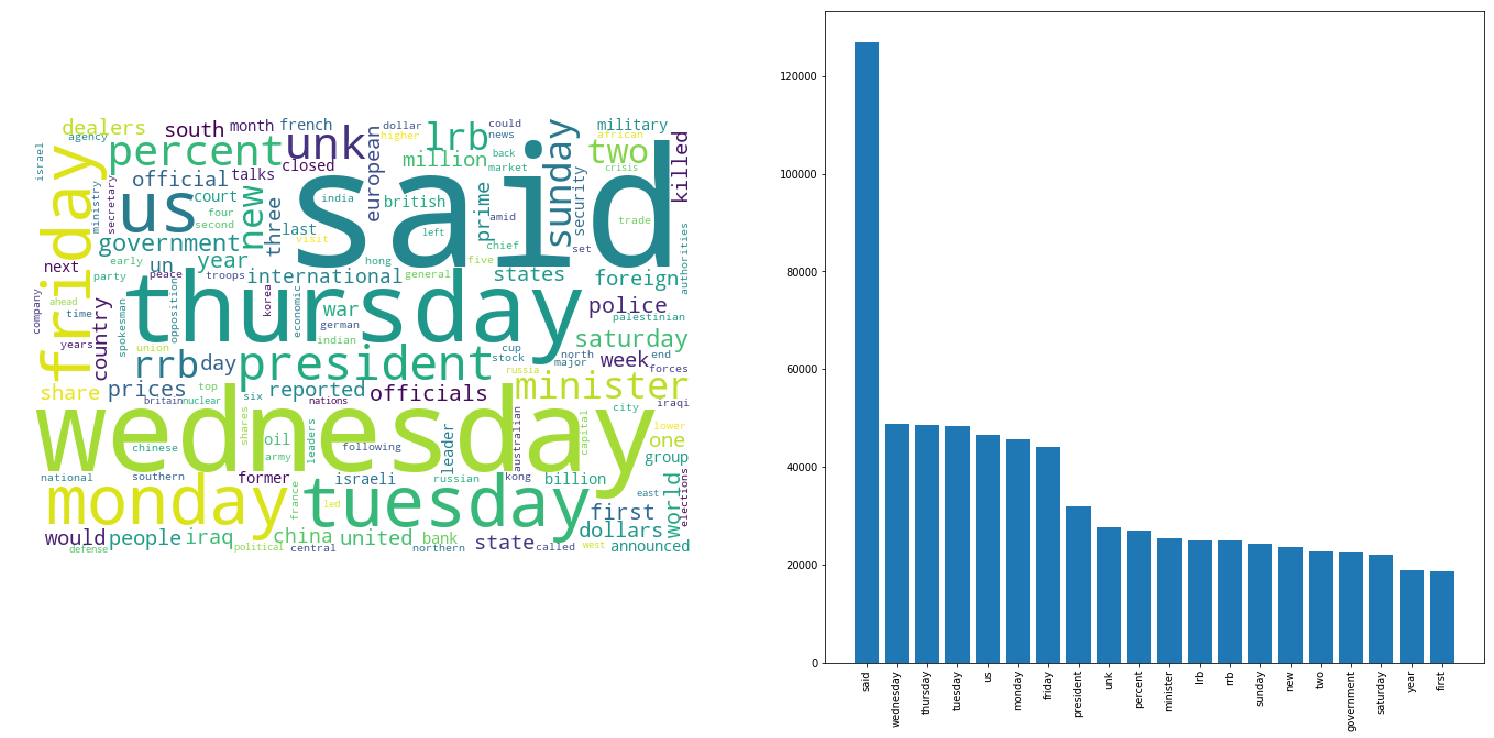

In [32]:
print('training data words analysis')
word_analysis(train_tokens)

validation data words analysis


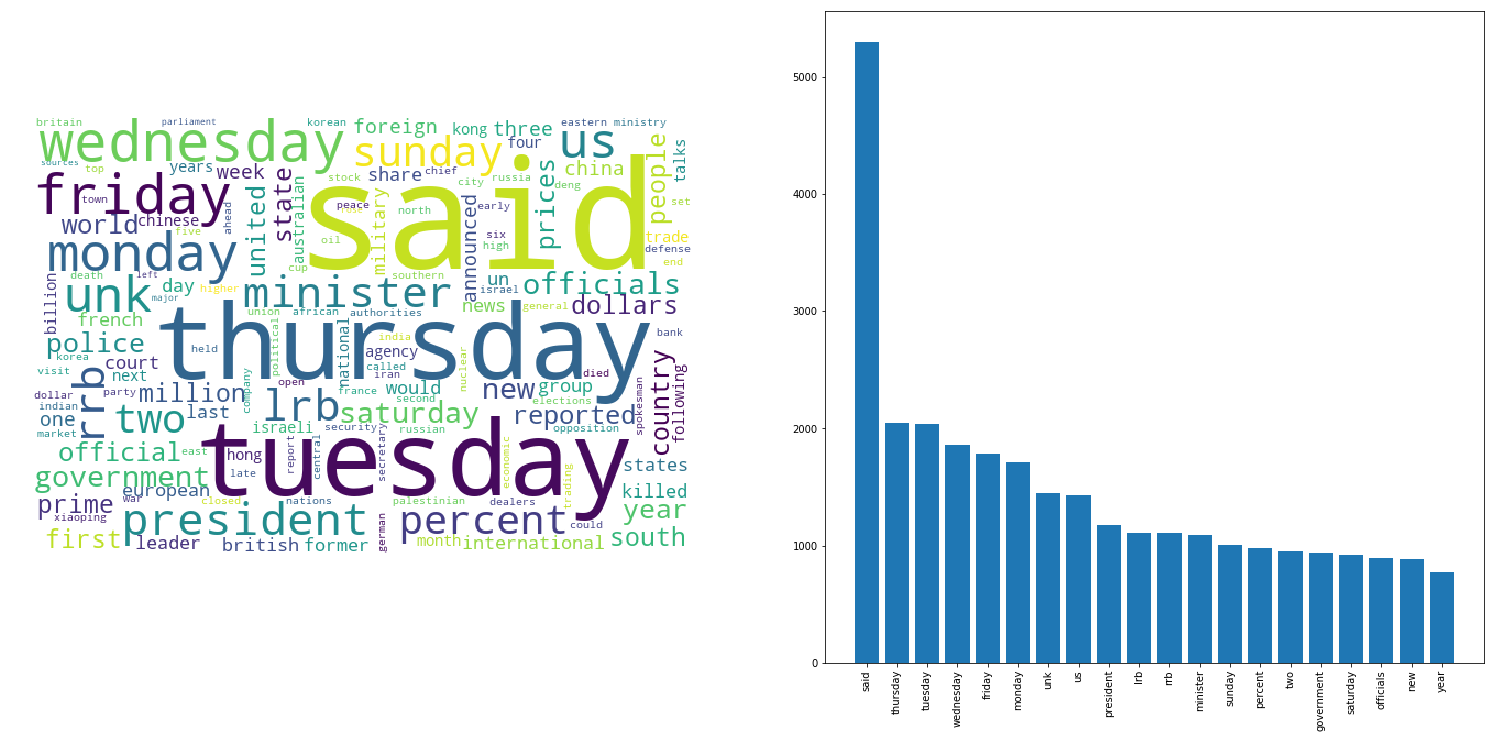

In [33]:
print('validation data words analysis')
word_analysis(val_tokens)

### Bigrams, Trigrams, Collocations

In [34]:
def ngram_analysis(docs):
    bigram_dist = FreqDist()
    trigram_dist = FreqDist()
    
    for doc in docs:
        bigrams = ngrams(doc.split(), 2)
        trigrams = ngrams(doc.split(), 3)
        
        bigram_dist.update(bigrams)
        trigram_dist.update(trigrams)
        
    bigram_dist.plot(25)
    trigram_dist.plot(15)

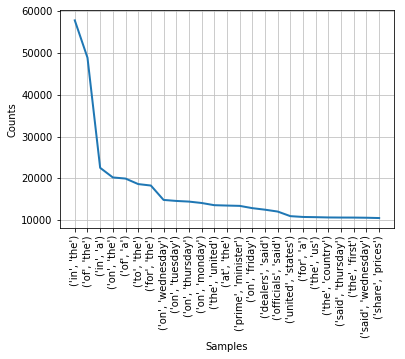

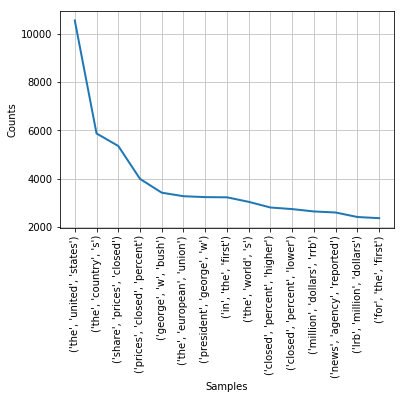

In [36]:
ngram_analysis(train_docs)

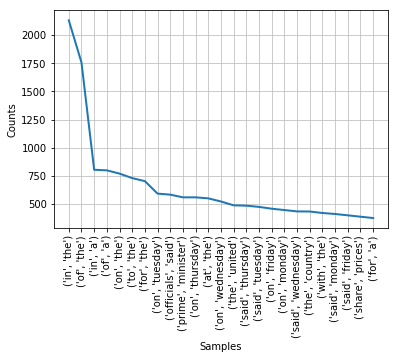

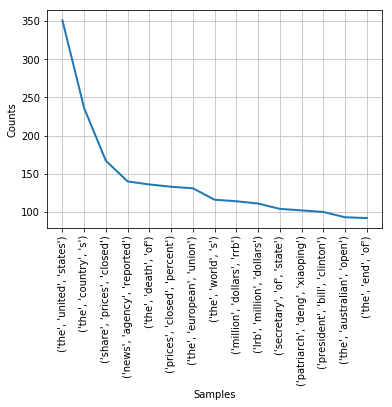

In [38]:
ngram_analysis(val_docs)

### Split into model input, model output

In [68]:
def prepare_X_y(docs, slice_factor=4):
    model_inputs, model_outputs = [], []
    
    for idx in range(len(docs)):
        tokens = docs[idx].split()
        _input = ' '.join(tokens[:(len(tokens) - slice_factor)])
        _output = ' '.join(tokens[(len(tokens) - slice_factor):])
        if idx < 3: 
            printmd('**input:** ' + _input + (' ____\t' * slice_factor))
            printmd('**expected output:** ' + _output)
            printmd('\n ----- \n')
        model_inputs.append(_input)
        model_outputs.append(_output)
        
    return model_inputs, model_outputs

In [69]:
val_inputs, val_outputs = prepare_X_y(val_docs)

**input:** five time world champion michelle kwan withdrew from the us figure skating championships on wednesday but will petition us skating officials for the chance to compete ____	 ____	 ____	 ____	

**expected output:** at the turin olympics


 ----- 


**input:** us business leaders lashed out wednesday at legislation that would penalize companies ____	 ____	 ____	 ____	

**expected output:** for employing illegal immigrants


 ----- 


**input:** general motors corp said wednesday its us sales fell percent in december and four percent in with the biggest losses coming ____	 ____	 ____	 ____	

**expected output:** from passenger car sales


 ----- 


# EDA for WikiText-2

## Read Corpus

In [11]:
wt_train_docs, wt_train_tokens, wt_train_dictionary = read_corpus('./Baseline_edu/dataset/train.txt')



chronicles iii



no 3 chronicles japanese lit battlefield 3 commonly referred as chronicles iii outside japan is a tactical role playing video game developed by media vision portable released in january in japan it is third game in series same fusion tactical real time as its predecessors story runs parallel first game follows nameless a penal military unit serving nation gallia second europan war who perform secret black operations are pitted imperial unit raven

game began development in carrying over a large portion work done on chronicles ii while it retained standard features series it also underwent multiple adjustments such as making game more series newcomers character designer composer both returned previous entries along chronicles ii director ozawa a large team writers handled script game s opening theme was sung by may n

number of documents: 36718
number of tokens: 1205450
dictionary size: 21190
lexical diversity of the corpus: 0.018


In [12]:
wt_valid_docs, wt_valid_tokens, wt_valid_dictionary = read_corpus('./Baseline_edu/dataset/valid.txt')



homarus



homarus known as european lobster or common lobster is a species lobster eastern atlantic ocean mediterranean sea parts black sea it is closely related american lobster h it may grow a length 60 cm 24 in a mass 6 kilograms 13 lb bears a conspicuous pair claws in life lobsters are blue only becoming lobster red on cooking mating occurs in summer producing eggs are carried by females up a year before hatching larvae homarus is a highly esteemed food is widely caught using lobster pots mostly around british isles



number of documents: 3760
number of tokens: 124363
dictionary size: 10648
lexical diversity of the corpus: 0.086


In [13]:
wt_test_docs, wt_test_tokens, wt_test_dictionary = read_corpus('./Baseline_edu/dataset/test.txt')



robert



robert is an english film television theatre actor he had a guest starring role on television series bill in was followed by a starring role in play herons written by simon stephens was performed in at royal court theatre he had a guest role in television series judge john in in landed a role as in episode teddy s story television series long firm he starred alongside actors mark strong jacobi he was cast in theatre productions philip ridley play mercury fur was performed at drum theatre in plymouth factory in london he was directed by john starred alongside ben harry kent stanton dominic hall

in starred alongside in play written by mark he appeared on a episode television series doctors followed by a role in theatre production curse directed by curse was performed at bush theatre in london borough starred in two films in by filmmaker paris punch directed by blackburn in may made a guest appearance on a two part episode arc television series waking dead followed by an appe

In [50]:
merged_dictionary_wt = merge_and_report_dictionaries(wt_train_dictionary, wt_valid_dictionary, wt_test_dictionary)

merged dictionary size: 21190


training data words analysis


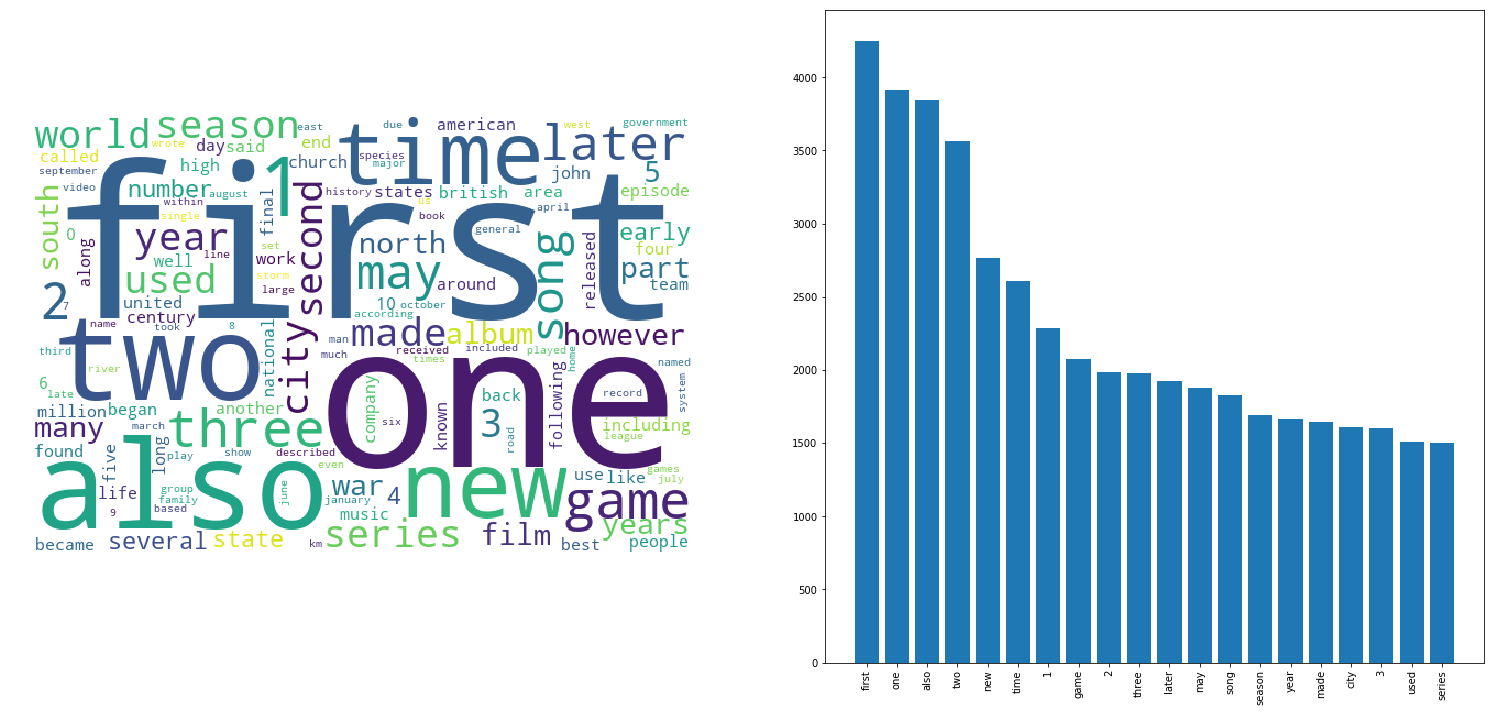

In [17]:
print('training data words analysis')
word_analysis(wt_train_tokens)

validation data words analysis


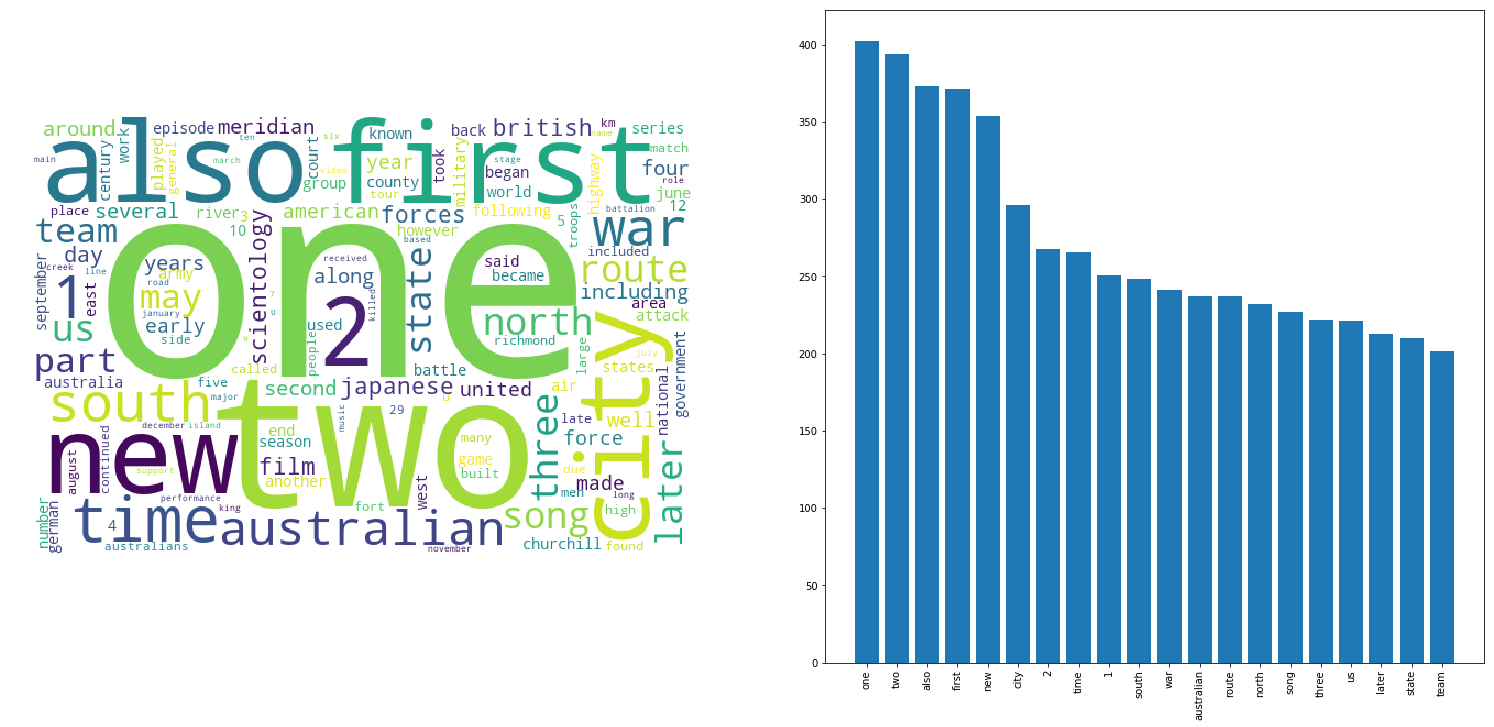

In [18]:
print('validation data words analysis')
word_analysis(wt_valid_tokens)

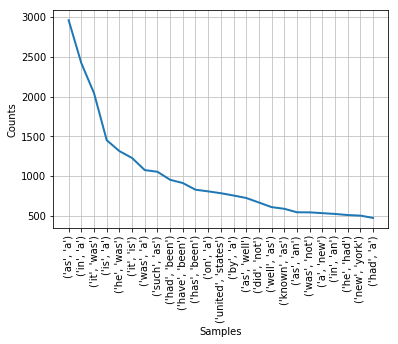

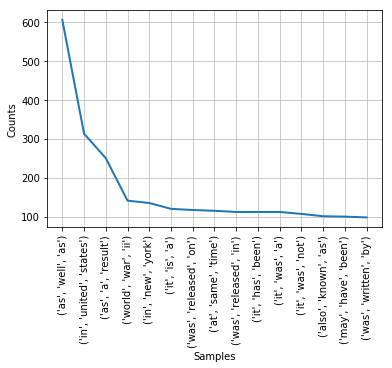

In [21]:
ngram_analysis(wt_train_docs)

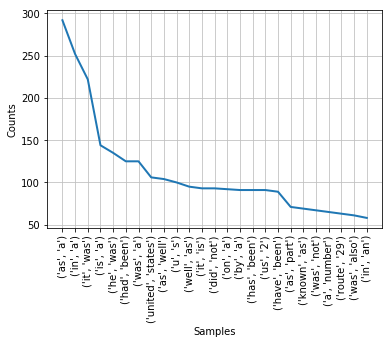

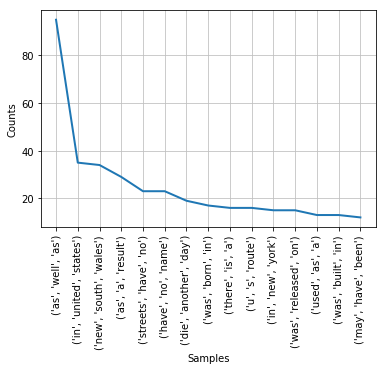

In [22]:
ngram_analysis(wt_valid_docs)

# EDA - WSJ

In [45]:
wsj_test_docs, wsj_test_tokens, wsj_test_dictionary = read_corpus('./data/gigaword_corpus/test.txt')

pierre vinken  61 years old  will join the board as a nonexecutive director nov  29 

mr  vinken is chairman of elsevier n v  the dutch publishing group 

rudolph agnew  55 years old and former chairman of consolidated gold fields plc  was named 1 a nonexecutive director of this british industrial conglomerate 

a form of asbestos once used   to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed  to it more than 30 years ago  researchers reported 0 t1 

the asbestos fiber  crocidolite  is unusually resilient once it enters the lungs  with even brief exposures to it causing symptoms that t1 show up decades later  researchers said 0 t2 

number of documents: 3914
number of tokens: 90522
dictionary size: 10176
lexical diversity of the corpus: 0.112


In [42]:
merged_dictionary = merge_and_report_dictionaries(train_dictionary, val_dictionary)

merged dictionary size: 59760


In [48]:
len(wsj_test_dictionary.difference(merged_dictionary))

1837

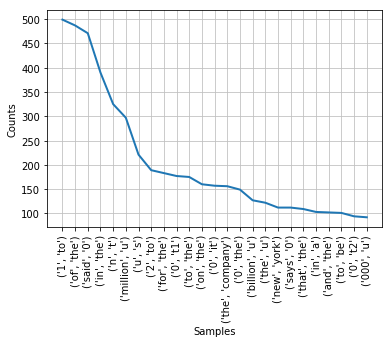

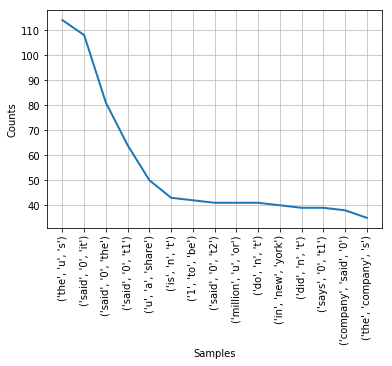

In [49]:
ngram_analysis(wsj_test_docs)